<a href="https://colab.research.google.com/github/jonitorta/Ejercicios_Machine_learning./blob/main/Kernel_density_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 4.1.1 Mathematical_stats.
In this script I'll implement some kernel density estimation and point estimations for lifetime of 20 motors 😈😈


In [1]:
#Import usefull libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Let's put the data from a string to a list with numeric types
raw_data = "1 4 5 21 22 28 40 42 51 53 58 67 95 124 124 160 202 260 303 363".split(" ")
#Here we mat every string to an int and then put it in a list =p.
data = list(map(int,raw_data))
data = np.array(data).reshape(len(data),1)
data

array([[  1],
       [  4],
       [  5],
       [ 21],
       [ 22],
       [ 28],
       [ 40],
       [ 42],
       [ 51],
       [ 53],
       [ 58],
       [ 67],
       [ 95],
       [124],
       [124],
       [160],
       [202],
       [260],
       [303],
       [363]])

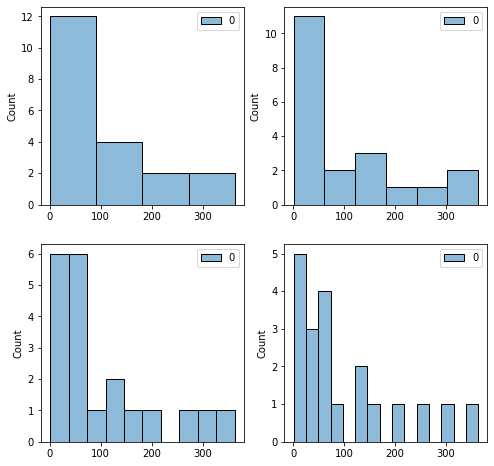

In [3]:
#Let's plot the data
fig, axes = plt.subplots(2,2, figsize = (8,8))
bins = [4,6,10,15]
#We can see that increasing bins change how the data dist looks
for ax , bins in zip(axes.flatten(),bins):
  sns.histplot(data=data, ax =ax, bins = bins)

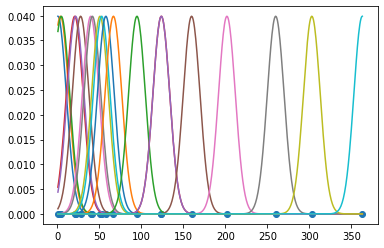

In [20]:
#This doesn't seems helpul so let's zoom and see what is going on
interval = np.linspace(data.min(),data.max(),500)
plt.scatter(data,np.zeros(len(data)))
for point in data:
  density = stats.norm.pdf(interval,loc = point, scale = 10)
  plt.plot(interval,density)  

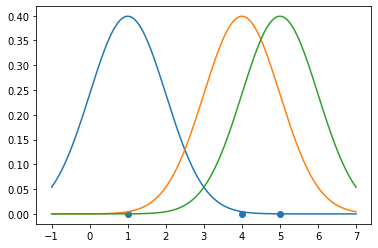

In [5]:
#We are just creating a normal distribution over the points
#we do this when loc = point-> create a normal distribution centered 
#at point with std 1
toy_data = data[0:3]
interval = np.linspace(toy_data.min()-2,toy_data.max()+2,500)
plt.scatter(toy_data,np.zeros(len(toy_data)))
for point in toy_data:
  density = stats.norm.pdf(interval,loc = point, scale = 1)
  plt.plot(interval,density)  

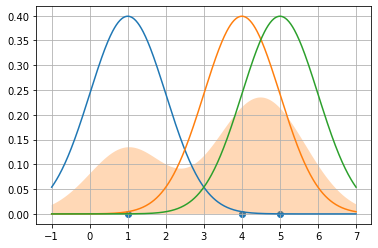

In [6]:
#Let's sum the 3 normal distributions and remember
#divide over n where n is the number of points so the final
#functions is a valid pdf(integrates to 1)
toy_data = data[0:3]
interval = np.linspace(toy_data.min()-2,toy_data.max()+2,500)
plt.scatter(toy_data,np.zeros(len(toy_data)))
sum = np.full_like(interval, 0)
for point in toy_data:
  density = stats.norm.pdf(interval,loc = point, scale = 1)
  sum += density
  plt.plot(interval,density)  
sum = sum/len(toy_data)
plt.fill_between(interval,sum, alpha = 0.3)
plt.grid()
plt.show()

In [7]:
#Now let's do this with the full data and avoid the individual normals.

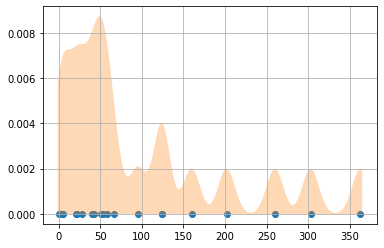

In [21]:
toy_data = data
interval = np.linspace(toy_data.min()-2,toy_data.max()+2,500)
plt.scatter(toy_data,np.zeros(len(toy_data)))
sum = np.full_like(interval, 0)
for point in toy_data:
  density = stats.norm.pdf(interval,loc = point, scale = 10)
  sum += density
  #plt.plot(interval,density)  
sum = sum/len(toy_data)
plt.fill_between(interval,sum, alpha = 0.3)
plt.grid()
plt.show()

Now suppose that data is from a gamma(1,theta) that is exp(theta), then doing a maximun estimation likelihood we obtain that the theta that maximize the chances of obtaining the values we observed is the sample mean.

In [57]:
#Let's check with a fit if we get the right answer
expo_fit = stats.expon.fit(data)
loc, scale = expo_fit
print(loc,scale)

1.0 100.15


In [60]:
#As we can see the sale in stats.expon is the same as the sample_mean so we are right
sample_mean = data.mean()
sample_mean

101.15

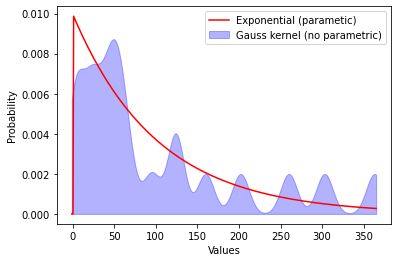

In [81]:
#Here we can see the difference between a non parametric fit by gaussian kernel and a parametric one
#where we i assume an exponential distribution
expo_pdf = stats.expon.pdf(x = interval, loc = 1, scale = sample_mean)
plt.fill_between(interval,sum, alpha = 0.3, color = "b", label = "Gauss kernel (no parametric)")
plt.plot(interval,expo_pdf, color = "r", label = "Exponential (parametic)")
plt.xlabel("Values")
plt.ylabel("Probability")
plt.legend()
plt.show()

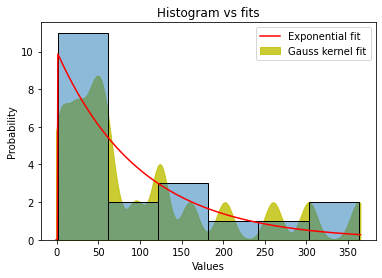

In [82]:
#Check the fit vs the histogram
expo_pdf = stats.expon.pdf(x = interval, loc = 1, scale = sample_mean)
plt.fill_between(interval,sum*1000, alpha = 0.8, color = "y", label = "Gauss kernel fit")
plt.plot(interval,expo_pdf*1000, color = "r", label = "Exponential fit")
sns.histplot(data = data, legend="Histogram")
plt.title("Histogram vs fits")
plt.xlabel("Values")
plt.ylabel("Probability")
plt.legend()
plt.show()